## 作者関係

In [1]:
import pandas as pd
import numpy as np
import random
import os
from tqdm import tqdm

import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport # profile report を作る用


In [2]:
DATA_PATH = "/home/knikaido/work/atma10/data/"
TRAIN_PATH = "/home/knikaido/work/atma10/data/train.csv"
TEST_PATH = "/home/knikaido/work/atma10/data/test.csv"
SUB_PATH = "/home/knikaido/work/atma10/data/atmacup10__sample_submission.csv"

In [3]:
SEED = 42
N_SPLITS = 5
SHUFFLE = True
LGBM_PARAMS = {'num_leaves': 32,
               'min_data_in_leaf': 64,
               'objective': 'regression',
               'max_depth': -1,
               'learning_rate': 0.05,
               "boosting": "gbdt",
               "bagging_freq": 1,
               "bagging_fraction": 0.8,
               "bagging_seed": SEED,
               "verbosity": -1,
              'reg_alpha': 0.1,
              'reg_lambda': 0.3,
              'colsample_bytree': 0.7,
              'metric':"rmse",
              'num_threads':6,
         }

LGBM_FIT_PARAMS = {
    'num_boost_round': 10000,
    'early_stopping_rounds': 200,
    'verbose_eval': 200,
}

SAVE_TEST_SUB_PATH = "sub01.csv"

In [4]:
def seed_everything(seed: int):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
seed_everything(SEED)

In [5]:
maker = pd.read_csv(DATA_PATH + 'maker.csv')
train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)

とりあえずプロファイル

In [7]:
# report = ProfileReport(train)
# report.to_file('train_report.html')

like順にソートして，データを眺める

In [7]:
train.sort_values('likes', ascending=False, inplace=True)
train

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
9610,cce5692fcc2d683c83e6,b3fe6620a23a80a4766d,"Night Watch, Militia Company of District II un...",Officieren en andere schutters van wijk II in ...,"Night Watch, Militia Company of District II un...",Rembrandt van Rijn,Rembrandt van Rijn,h 379.5cm × w 453.5cm × w 337kg,NaN,Officers and other civic guardsmen of District...,loan,1808-01-01T00:00:00,On loan from the City of Amsterdam,1642,1642.0,17,1642.0,1642.0,27392
1447,1eae1bab484d72d0000a,4835e3cb2e57975817d7,Still Life with Flowers in a Glass Vase,Stilleven met bloemen in een glazen vaas op ee...,"Still Life with Flowers in a Glass Vase, Jan D...",Jan Davidsz. de Heem,Jan Davidsz. de Heem,h 54.5cm × w 36.5cm × d 7.8cm,NaN,Still Life with Flowers in a Glass Vase,loan,1885-06-30T00:00:00,On loan from the City of Amsterdam (A. van der...,1650 - 1683,1650.0,17,1650.0,1683.0,21685
2962,3fc75b941bb6c1529f05,37176565918cd6413a82,Children of the Sea,Voorstelling getiteld 'Kinderen der zee'. Vier...,"Children of the Sea, Jozef Israëls, 1872",Jozef Israëls,Jozef Israëls,h 48.5cm × w 93.5cm,NaN,Children of the Sea,bequest,1907-01-01T00:00:00,"J.B.A.M. Westerwoudt Bequest, Haarlem",1872,1872.0,19,1872.0,1872.0,19698
3970,54f28a153631c8f1776e,b86e2209561a42cf9044,Girl in a White Kimono,"Een meisje gekleed in een kimono, achterover l...","Girl in a White Kimono, George Hendrik Breitne...",George Hendrik Breitner,George Hendrik Breitner,h 59cm × w 57cm × d 11cm,NaN,Girl in a White Kimono Girl in Kimono (Geesje ...,bequest,1944-01-01T00:00:00,"Mr and Mrs Drucker-Fraser Bequest, Montreux",1894,1894.0,19,1894.0,1894.0,14867
6185,843e1cb329e39186c625,063a112835f930db2fae,Italian Landscape with Umbrella Pines,Italiaans landschap met parasoldennen of pijnb...,"Italian Landscape with Umbrella Pines, Hendrik...",Hendrik Voogd,Hendrik Voogd,h 101.5cm × w 138.5cm,NaN,Italian Landscape with Umbrella Pines,purchase,1976-01-01T00:00:00,NaN,1807,1807.0,19,1807.0,1807.0,14172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8360,b264bb676269001d74c0,b1fbf8e04afb18374851,Portret van een onbekende man,NaN,"Portret van een onbekende man, Verbeke-Schodts...",Verbeke-Schodts Fils,Verbeke-Schodts Fils,h 100mm × w 64mm,NaN,Portret van een onbekende man,transfer,1994-01-01T00:00:00,NaN,1899 - 1908,1899.0,19,1899.0,1908.0,0
8358,b2641c5c618ef5b8a823,0eafd998d3d0d4f8f502,"Reliëf IV in Bishapur, voorstellend de Sassani...",Onderdeel van Reisalbum van H. Dunlop met foto...,"Reliëf IV in Bishapur, voorstellend de Sassani...",Antoine Sevruguin,Antoine Sevruguin,h 168mm × w 224mm,NaN,"Reliëf IV in Bishapur, voorstellend de Sassani...",transfer,1994-01-01T00:00:00,NaN,c. 1880 - c. 1895,1880.0,19,1880.0,1895.0,0
1020,157ccd8db1c709d2bb87,adf4c866e9692f730046,Mars en Venus verrast door Vulcanus,Mars en Venus als geliefden op een bed. Links ...,"Mars en Venus verrast door Vulcanus, Jan van d...",Jan van de Velde (II),Jan van de Velde (II),h 158mm × w 105mm,NaN,Mars en Venus verrast door Vulcanus,unknown,1991-01-01T00:00:00,NaN,1621,1621.0,17,1621.0,1621.0,0
479,09aef726e6bcf17bde73,652fea965d02ce4cfe8e,"Portret van een onbekende man, zittend aan taf...",NaN,"Portret van een onbekende man, zittend aan taf...",Bisson Frères,Bisson Frères,h 95mm × w 58mm,NaN,"Portret van een onbekende man, zittend aan taf...",transfer,1994-01-01T00:00:00,NaN,1852 - 1863,1852.0,19,1852.0,1863.0,0


書くのにかかった年数と，likeの間に相関あるかな？→なさそう

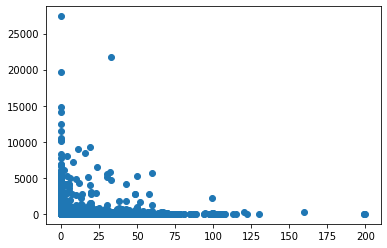

In [8]:
train['date_range'] = train['dating_year_late']- train['dating_year_early']
plt.scatter(train['date_range'], train['likes'])

200ねんとかかかってる絵があるんだねえ

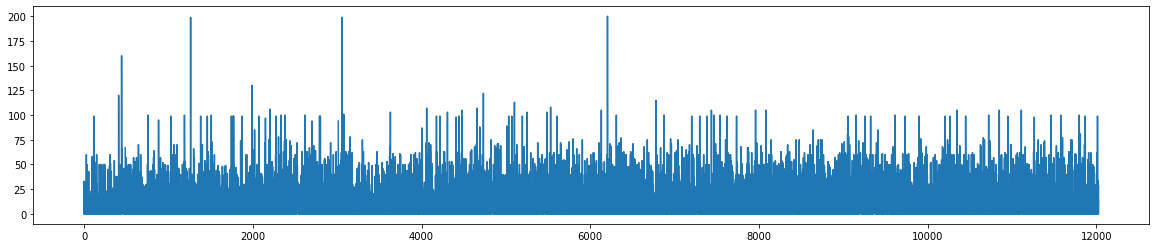

In [9]:
plt.figure(figsize=(20, 4))
plt.plot(train['date_range'].values)

In [10]:
train.sort_values('date_range', ascending=False)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes,date_range
1745,2590fbaa10477ff1ff6f,65770b4b90c803e121b4,Gezicht op het Franse kamp op het Malieveld te...,Gezicht op het Franse kamp op het malieveld in...,Gezicht op het Franse kamp op het Malieveld te...,André,André,h 495mm × w 365mm,NaN,Gezicht op het Franse kamp op het Malieveld te...,gift,1939-01-01T00:00:00,"Gift of F.G. Waller, Amsterdam",1606 - 1806,1606.0,17,1606.0,1806.0,3,200.0
8571,b76a2b687a94468b1182,c9347479a6133629d95b,"Portrait of Gaston de Foix, French Military Co...","Portret van Gaston de Foix (1489-1512), frans ...","Portrait of Gaston de Foix, French Military Co...",anonymous,anonymous,h 53.2cm × w 46cm × t 1.5cm × d 2.4cm,NaN,"Portrait of Gaston de Foix, French Military Co...",nationalization 1795,1798-09-01T00:00:00,NaN,1600 - 1799,1600.0,16,1600.0,1799.0,11,199.0
5884,7d5303d7d9bbb90d1663,11d0706ace59d53b6ba4,Sint Nicolaasfeest,Interieur waarin een familie het Sint Nicolaas...,"Sint Nicolaasfeest, anonymous, 1700 - 1899",anonymous,anonymous,h 59cm × w 75cm × d 9.4cm,NaN,Sint Nicolaasfeest,bequest,1870-01-01T00:00:00,"Dupper Wzn. Bequest, Dordrecht",1700 - 1899,1700.0,17,1700.0,1899.0,54,199.0
827,1142a4e3eb5b5fb901d2,136df300aec2d46c4206,Portret van Rembrandt Harmensz. van Rijn,"Buste van een man, het gelaat en face, een ket...","Portret van Rembrandt Harmensz. van Rijn, Remb...",Rembrandt van Rijn,Rembrandt van Rijn,h 21cm × w 17cm × d 7.2cm,NaN,Portret van Rembrandt Harmensz. van Rijn Zelfp...,gift,1940-03-01T00:00:00,"Gift of Mr and Mrs Kessler-Hülsmann, Kapelle o...",1640 - 1800,1640.0,17,1640.0,1800.0,278,160.0
755,0fa6e904ea2df7bc1fed,6dca1517f93216bd7d95,Portrait of a Man,"Portret van een man. Buste naar rechts, de lin...","Portrait of a Man, Aert Pietersz. (copy after)...",Aert Pietersz.,Aert Pietersz.,h 56cm × w 46cm × d 7cm,NaN,Portrait of a Man,gift,1885-11-01T00:00:00,"Gift of Jonkheer J.S.R. van de Poll, Arnhem",1570 - 1700,1570.0,16,1570.0,1700.0,26,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4622,63528a07ae1bef516c8d,885c838ad997608f43be,mensen naast huis onder boom,NaN,"mensen naast huis onder boom, Fabio Ventura",Fabio Ventura,Fabio Ventura,h 301mm × w 242mm,NaN,mensen naast huis onder boom,transfer,1994-01-01T00:00:00,NaN,NaN,NaN,-2,NaN,NaN,5,NaN
5352,72d813952ee0010a8bbd,c114547ac5fdac73a567,Verdorvenheid en geweld op aarde vóór de zondv...,"Op de voorgrond worden mannen, vrouwen en kind...",Verdorvenheid en geweld op aarde vóór de zondv...,Johann Sadeler (I),Johann Sadeler (I),h 210mm × w 274mm,NaN,Verdorvenheid en geweld op aarde vóór de zondv...,transfer,1816-01-01T00:00:00,NaN,1586,1586.0,16,1586.0,NaN,4,NaN
3134,43b4da35661fb0c34413,d44af1b3af166eae9a76,jonge man biedt vrouw bloemen aan (nabootsing ...,NaN,jonge man biedt vrouw bloemen aan (nabootsing ...,Guido Rey,Guido Rey,h 204mm × w 154mm,NaN,jonge man biedt vrouw bloemen aan (nabootsing ...,transfer,1994-01-01T00:00:00,NaN,NaN,NaN,-2,NaN,NaN,3,NaN
2890,3e6ad7385485a9d2add9,c66caefea4a475e52ea1,Zittende halfnaakte vrouwelijke personificatie...,NaN,Zittende halfnaakte vrouwelijke personificatie...,Gustav Eilers,Gustav Eilers,h mm × w mm,NaN,Zittende halfnaakte vrouwelijke personificatie...,unknown,NaN,NaN,NaN,NaN,-2,NaN,NaN,0,NaN


In [14]:
train['principal_maker'].value_counts()

anonymous                           1692
Johann Sadeler (I)                   347
Bernard Picart                       273
Richard Tepe                         180
anoniem (Monumentenzorg)             170
                                    ... 
A. van Hoef                            1
Willem Pietersz. Buytewech             1
Willem Troost (II)                     1
Giampetrino                            1
Christiaan Lodewijk van Kesteren       1
Name: principal_maker, Length: 2221, dtype: int64

同じ作者なら，晩年のほうがlikes多かったりするのかな？

In [26]:
tgt_name = 'Johann Sadeler (I)'

In [27]:
train_maker = train[train['principal_maker'] == tgt_name]
train_maker.sort_values('dating_sorting_date', inplace=True)
train_maker

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes,date_range
4771,668ff32a2e37a94e5b87,4178d5d45635fecec1a1,Vanitasvoorstelling met een schedel en twee be...,Vanitasvoorstelling met een schedel en twee be...,Vanitasvoorstelling met een schedel en twee be...,Johann Sadeler (I),Johann Sadeler (I),h 98mm × w 75mm,NaN,Vanitasvoorstelling met een schedel en twee be...,transfer,1816-01-01T00:00:00,NaN,1560 - 1620,1560.0,16,1560.0,1620.0,72,60.0
1127,1817cd8735482c082748,87c4bcc5c18710e9265a,Opstanding van Christus: Pasen,Christus verrijst uit zijn graf. Aan weerszijd...,"Opstanding van Christus: Pasen, Johann Sadeler...",Johann Sadeler (I),Johann Sadeler (I),h 291mm × w 222mm,NaN,Opstanding van Christus: Pasen Resvrrectio De ...,unknown,NaN,NaN,1560 - 1600,1560.0,16,1560.0,1600.0,12,40.0
8935,bef1bb74d24ae61b680d,c5197f8509af726de4ed,Geseling van Christus,"Christus, naakt vastgebonden aan een pilaar, w...","Geseling van Christus, Johann Sadeler (I), 156...",Johann Sadeler (I),Johann Sadeler (I),h 164mm × w 112mm,NaN,Geseling van Christus Passie van Christus Pass...,purchase,1887-01-01T00:00:00,NaN,1560 - 1600,1560.0,16,1560.0,1600.0,6,40.0
7589,a2343392ad485de4df96,321c23de38fb3f3aa7bd,Landschap met de lamme die de blinde leidt,De lamme man zit op de rug van de blinde man d...,"Landschap met de lamme die de blinde leidt, Jo...",Johann Sadeler (I),Johann Sadeler (I),h 214mm × w 271mm,NaN,Landschap met de lamme die de blinde leidt Cha...,transfer,1816-01-01T00:00:00,NaN,1560 - 1600,1560.0,16,1560.0,1600.0,2,40.0
547,0b0c484b539a783bef53,f6275fb3fb740d2f0211,Franciscus van Assisi ontvangt de stigmata,De H. Franciscus zit geknield in de wildernis....,"Franciscus van Assisi ontvangt de stigmata, Jo...",Johann Sadeler (I),Johann Sadeler (I),h 255mm × w 176mm,NaN,Franciscus van Assisi ontvangt de stigmata,transfer,1816-01-01T00:00:00,NaN,1560 - 1600,1560.0,16,1560.0,1600.0,2,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10593,e15440fd2d62b6166492,1abdedf777674ef451d3,Schepping van Adam en Eva,Ten midden van de dieren worden Adam en Eva ge...,"Schepping van Adam en Eva, Johann Sadeler (I),...",Johann Sadeler (I),Johann Sadeler (I),h 196mm × w 254mm,NaN,Schepping van Adam en Eva Schepping van de wereld,purchase,1904-01-01T00:00:00,NaN,1639,1639.0,17,1639.0,1639.0,11,0.0
351,06ef052d08481dc9509c,a596b47082cd3db30a6e,Mishandeling van de Israelieten door de Egypte...,Een Israelitische arbeider valt op de grond en...,Mishandeling van de Israelieten door de Egypte...,Johann Sadeler (I),Johann Sadeler (I),h 203mm × w 287mm,NaN,Mishandeling van de Israelieten door de Egypte...,purchase,1904-01-01T00:00:00,NaN,1639,1639.0,17,1639.0,1639.0,0,0.0
8146,ae135802dcb874c02dad,1b875313e9165ac1c759,Aanbidding der herders,Drie herders zitten geknield voor de kribbe me...,"Aanbidding der herders, Johann Sadeler (I), 16...",Johann Sadeler (I),Johann Sadeler (I),h 210mm × w 265mm,NaN,Aanbidding der herders,unknown,NaN,NaN,1643 - 1666,1643.0,17,1643.0,1666.0,5,23.0
5566,7714b02cf536b217df02,afdc2b2b9013f6f96c70,Christus en zijn bruid onder een appelboom,De bruid van Christus (de kerk) zit onder een ...,"Christus en zijn bruid onder een appelboom, Jo...",Johann Sadeler (I),Johann Sadeler (I),h 211mm × w 259mm,NaN,Christus en zijn bruid onder een appelboom Can...,purchase,1904-01-01T00:00:00,NaN,1643,1643.0,17,1643.0,1643.0,3,0.0


In [28]:
maker[maker['name'] == tgt_name]

,name,place_of_birth,date_of_birth,date_of_death,place_of_death,nationality
2023,Johann Sadeler (I),Brussel,1550,1600-08,Venetië,NaN


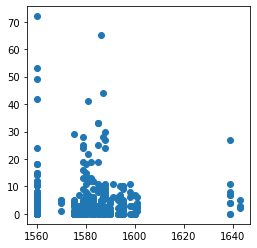

In [19]:
plt.figure(figsize=(4, 4))
plt.scatter(train_maker['dating_sorting_date'].values, train_maker['likes'].values)
# plt.plot(train_maker['dating_year_early'].values)

In [107]:
train_maker_count = train_maker.groupby('dating_sorting_date').count()
train_maker_count

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_period,dating_year_early,dating_year_late,likes,date_range
dating_sorting_date,,,,,,,,,,,,,,,,,,,
1900.0,178,178,178,2,178,178,178,178,178,178,178,178,47,178,178,178,178,178,178
1915.0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1920.0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1


たくさん作品を出している年は，likesの多いものもあるね

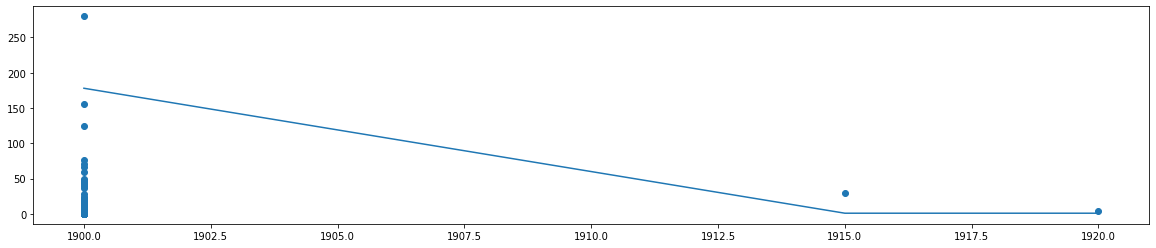

In [108]:
plt.figure(figsize=(20, 4))
plt.scatter(train_maker['dating_sorting_date'].values, train_maker['likes'].values)
plt.plot(train_maker_count.index, train_maker_count['object_id'])

In [56]:
date_counts = train_maker['dating_sorting_date'].value_counts()
date_counts = date_counts.reset_index()
date_counts.rename(columns={'index': 'dating_sorting_date', 'dating_sorting_date': 'count'})

,dating_sorting_date,count
0,1560.0,56
1,1583.0,42
2,1586.0,24
3,1580.0,22
4,1575.0,21
5,1579.0,18
6,1595.0,18
7,1588.0,17
8,1587.0,16
9,1582.0,14


アートシリーズが続いているほど人気，とかあるのかな？

In [14]:

train['art_series_id'].value_counts()

b40586f3c4e05771b221    9
ba68a3c8f4fae208aa76    8
f7ed7bf1f093c97f1f9e    8
2f616571b1acd2e7a0c4    8
81f184bc44d573020783    7
                       ..
0ddfd0f0433ac2b30f40    1
1b683b46b227d39c5715    1
c3788cb5a752ce3e30eb    1
6b461116570314dcab81    1
16cc78d153c0e6aa7aa8    1
Name: art_series_id, Length: 11169, dtype: int64

In [15]:
train[train['art_series_id']=='ba68a3c8f4fae208aa76']

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
871,126187bd3c510b9030a6,ba68a3c8f4fae208aa76,"Studie van een naakte peuter en vrouw, door Ja...",Deze foto maakt deel uit van een album.,"Studie van een naakte peuter en vrouw, door Ja...",Jacques Lalaing,Jacques Lalaing,h 114mm × w 64mm,NaN,"Studie van een naakte peuter en vrouw, door Ja...",purchase,2001-01-01T00:00:00,NaN,c. 1900 - c. 1914,1900.0,19,1900.0,1914.0,3
2113,2cf7fa3a67367e4361d5,ba68a3c8f4fae208aa76,"Studie van een naakte peuter en vrouw, door Ja...",Deze foto maakt deel uit van een album.,"Studie van een naakte peuter en vrouw, door Ja...",Jacques Lalaing,Jacques Lalaing,h 115mm × w 69mm,NaN,"Studie van een naakte peuter en vrouw, door Ja...",purchase,2001-01-01T00:00:00,NaN,c. 1900 - c. 1914,1900.0,19,1900.0,1914.0,2
4189,59bb617cdc24e1b7842f,ba68a3c8f4fae208aa76,"Studie van een naakte peuter en vrouw, door Ja...",Deze foto maakt deel uit van een album.,"Studie van een naakte peuter en vrouw, door Ja...",Jacques Lalaing,Jacques Lalaing,h 119mm × w 67mm,NaN,"Studie van een naakte peuter en vrouw, door Ja...",purchase,2001-01-01T00:00:00,NaN,c. 1900 - c. 1914,1900.0,19,1900.0,1914.0,4
7051,97663a2e59fa9316041a,ba68a3c8f4fae208aa76,"Studie van een naakte peuter en vrouw, door Ja...",Deze foto maakt deel uit van een album.,"Studie van een naakte peuter en vrouw, door Ja...",Jacques Lalaing,Jacques Lalaing,h 119mm × w 64mm,NaN,"Studie van een naakte peuter en vrouw, door Ja...",purchase,2001-01-01T00:00:00,NaN,c. 1900 - c. 1914,1900.0,19,1900.0,1914.0,1
7182,9a50f940d8bb04bc3018,ba68a3c8f4fae208aa76,"Studie van een naakte peuter en vrouw, door Ja...",Deze foto maakt deel uit van een album.,"Studie van een naakte peuter en vrouw, door Ja...",Jacques Lalaing,Jacques Lalaing,h 113mm × w 70mm,NaN,"Studie van een naakte peuter en vrouw, door Ja...",purchase,2001-01-01T00:00:00,NaN,c. 1900 - c. 1914,1900.0,19,1900.0,1914.0,0
10225,da1ccf1e0631d108d365,ba68a3c8f4fae208aa76,"Studie van een naakte peuter en vrouw, door Ja...",Deze foto maakt deel uit van een album.,"Studie van een naakte peuter en vrouw, door Ja...",Jacques Lalaing,Jacques Lalaing,h 129mm × w 84mm,NaN,"Studie van een naakte peuter en vrouw, door Ja...",purchase,2001-01-01T00:00:00,NaN,c. 1900 - c. 1914,1900.0,19,1900.0,1914.0,3
11123,ec9387f07d84c89d1ff9,ba68a3c8f4fae208aa76,"Studie van een naakte peuter en vrouw, door Ja...",Deze foto maakt deel uit van een album.,"Studie van een naakte peuter en vrouw, door Ja...",Jacques Lalaing,Jacques Lalaing,h 123mm × w 69mm,NaN,"Studie van een naakte peuter en vrouw, door Ja...",purchase,2001-01-01T00:00:00,NaN,c. 1900 - c. 1914,1900.0,19,1900.0,1914.0,0
11336,f196f4557312d1427502,ba68a3c8f4fae208aa76,"Studie van een naakte peuter en vrouw, door Ja...",Deze foto maakt deel uit van een album.,"Studie van een naakte peuter en vrouw, door Ja...",Jacques Lalaing,Jacques Lalaing,h 125mm × w 74mm,NaN,"Studie van een naakte peuter en vrouw, door Ja...",purchase,2001-01-01T00:00:00,NaN,c. 1900 - c. 1914,1900.0,19,1900.0,1914.0,0


In [21]:
maker = pd.read_csv(DATA_PATH + 'maker.csv')

In [22]:
maker

,name,place_of_birth,date_of_birth,date_of_death,place_of_death,nationality
0,'t Hooft,NaN,NaN,NaN,NaN,NaN
1,A. & G. Taylor,NaN,NaN,NaN,NaN,NaN
2,A. Böeseken,'s-Heerenberg,1834-01-12,1919-02-11,Rotterdam,NaN
3,A. Cucumus & Cie.,NaN,NaN,NaN,NaN,NaN
4,A. Dandoy,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3286,Édouard Denis Baldus,Grünbach,1813-06-05,1889,Parijs,NaN
3287,Émile Bernard,Lille,1868-04-28,1941-04-16,Parijs,NaN
3288,Émile Fürst,Angers,1834,1922,Nantes,NaN
3289,Émilien Desmaisons,Parijs,1812-12-19,1880-01-28,Montlignon,NaN


In [23]:
maker.iloc[:, 1:].count(axis=1)

0       0
1       0
2       4
3       0
4       0
       ..
3286    4
3287    4
3288    4
3289    4
3290    2
Length: 3291, dtype: int64